## Imports

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [199]:
train_df = pd.read_csv('data/train.csv')
center_info = pd.read_csv('data/fulfilment_center_info.csv')
meal_info = pd.read_csv('data/meal_info.csv')
test_df = pd.read_csv('data/test.csv')


## Inspect Data

### Numerical inspection and summaries

In [201]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [203]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [205]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [207]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


**In addition to the train data, there are additional files with features related to the center and meal**
* *We will have to merge these*

#### Review/Explore the data in each of these dfs ####

In [209]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [211]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [217]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


*There are no null values in any of the dataframes*

### Check for duplicates

In [219]:
train_df.duplicated().sum()

0

In [221]:
center_info.duplicated().sum()

0

In [223]:
meal_info.duplicated().sum()

0

In [225]:
test_df.duplicated().sum()

0

***No duplicates found***

### Missing values

***There are no null values as seen in df info above***

***However, it is possible there are missing rows where there were no orders for a given week+center_id+meal_id combination***

In [227]:
num_centers = train_df.center_id.nunique()
num_centers

77

In [229]:
num_meals = train_df.meal_id.nunique()
num_meals

51

In [231]:
#Number of unique center-meal combos
center_meal_combos = num_centers * num_meals
center_meal_combos

3927

In [233]:
expected_rows_in_train = num_centers * num_meals * 145
expected_rows_in_train

569415

In [235]:
len(train_df)

456548

In [237]:
missing_rows = expected_rows_in_train - len(train_df)
missing_rows

112867

*Looks like the data does not have orders for all center-meal combos for all weeks*

* ***We need to add rows with 0 orders to get a proper time series analysis data - to be able to run Time Series Analysis models?***

#### Convert week to datetime

In [239]:
train_df.week.nunique()

145

In [241]:
train_df['Date'] = pd.to_datetime((train_df['week'] - 1) * 7 * 24 * 60 * 60 * 1000 + 1577836800000, unit='ms')
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,2022-10-05
456544,1062036,145,61,2304,482.09,482.09,0,0,42,2022-10-05
456545,1110849,145,61,2664,237.68,321.07,0,0,501,2022-10-05
456546,1147725,145,61,2569,243.50,313.34,0,0,729,2022-10-05


## EDA

### Numeric Values

In [245]:
train_df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,2021-05-31 09:09:12.882938624
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,2020-01-01 00:00:00
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,2020-09-23 00:00:00
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,2021-06-09 00:00:00
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,2022-02-09 00:00:00
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,2022-10-05 00:00:00
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,NaN


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'week'}>,
        <Axes: title={'center': 'center_id'}>],
       [<Axes: title={'center': 'meal_id'}>,
        <Axes: title={'center': 'checkout_price'}>,
        <Axes: title={'center': 'base_price'}>],
       [<Axes: title={'center': 'emailer_for_promotion'}>,
        <Axes: title={'center': 'homepage_featured'}>,
        <Axes: title={'center': 'num_orders'}>],
       [<Axes: title={'center': 'Date'}>, <Axes: >, <Axes: >]],
      dtype=object)

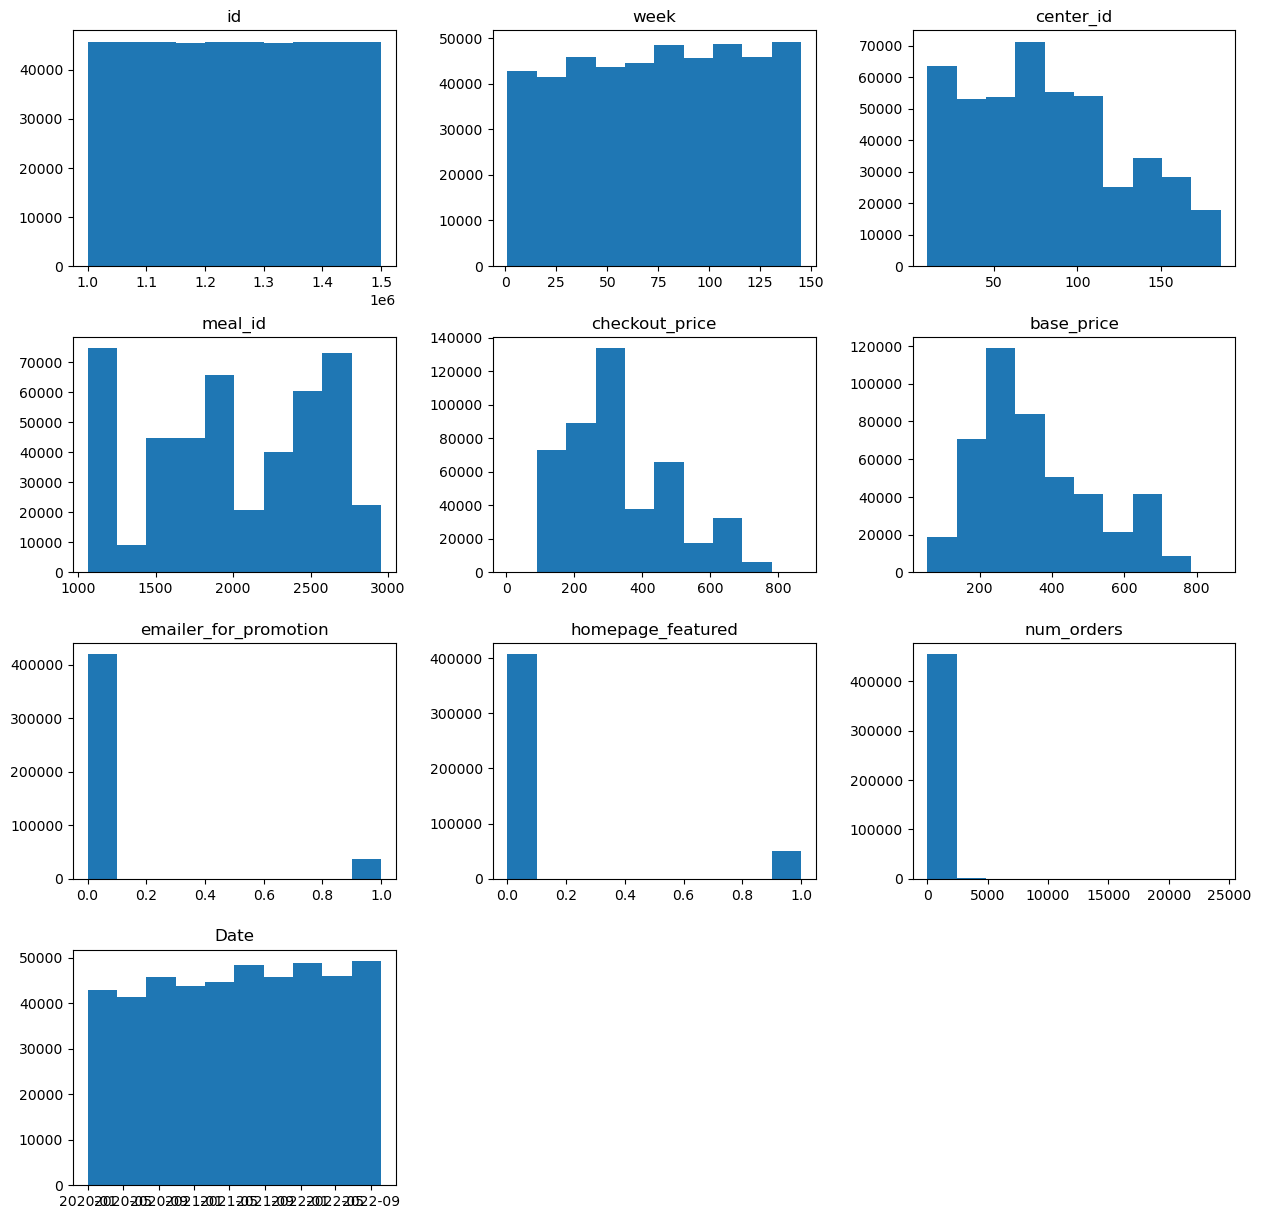

In [250]:
train_df.hist(figsize = (15, 15), grid = False)

In [258]:
center_info.describe()

,center_id,city_code,region_code,op_area
count,77.000000,77.000000,77.000000,77.000000
mean,83.142857,600.662338,56.493506,3.985714
std,46.090219,66.720274,18.126473,1.106406
min,10.000000,456.000000,23.000000,0.900000
25%,50.000000,553.000000,34.000000,3.500000
50%,77.000000,596.000000,56.000000,3.900000
75%,110.000000,651.000000,77.000000,4.400000
max,186.000000,713.000000,93.000000,7.000000


In [261]:
center_info.op_area.nunique()

30

array([[<Axes: title={'center': 'center_id'}>,
        <Axes: title={'center': 'city_code'}>],
       [<Axes: title={'center': 'region_code'}>,
        <Axes: title={'center': 'op_area'}>]], dtype=object)

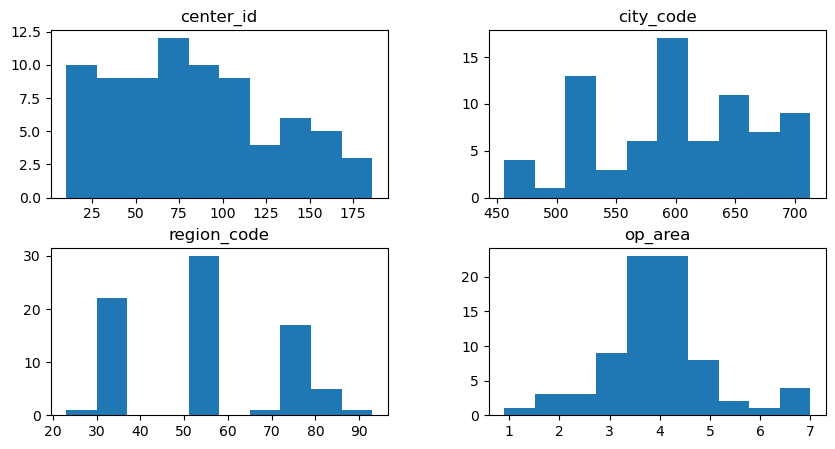

In [269]:
center_info.hist(figsize = (10, 5), grid = False)

array([[<Axes: title={'center': 'meal_id'}>]], dtype=object)

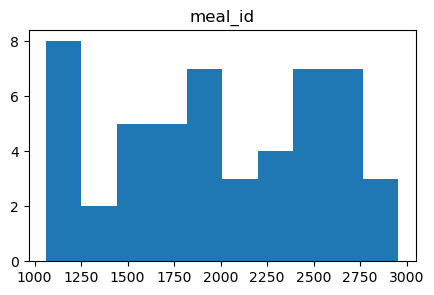

In [277]:
meal_info.hist(figsize = (5, 3), grid = False)

### Categorical 

In [565]:
center_catcols = ['city_code', 'region_code', 'center_type', 'op_area']

In [292]:
center_info.describe(include = 'object')

,center_type
count,77
unique,3
top,TYPE_A
freq,43


In [279]:
meal_info.describe(include = 'object')

,category,cuisine
count,51,51
unique,14,4
top,Beverages,Thai
freq,12,15


[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


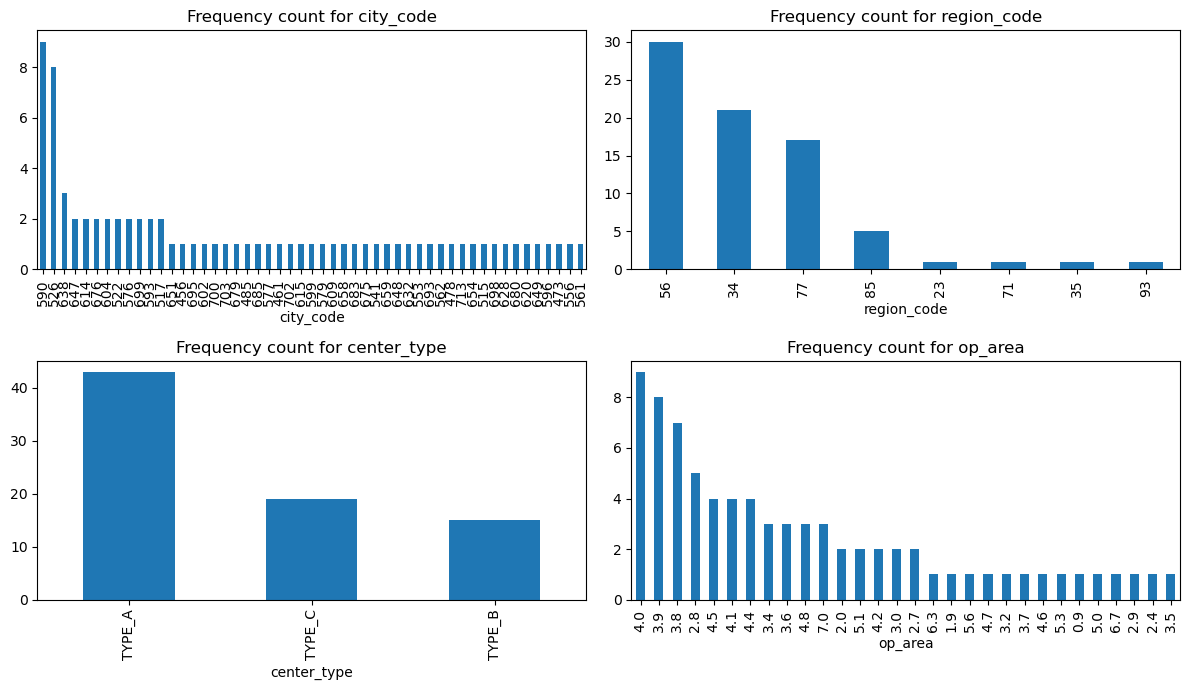

In [567]:
fig, axs = plt.subplots(nrows = 2, ncols=2, figsize=(12, 7))
print(axs)
for i, cat in enumerate(center_catcols):
    center_info[cat].value_counts().plot(kind = 'bar', title = f"Frequency count for {cat}", ax = axs[i//2, i%2])

plt.tight_layout()
plt.show()

In [326]:
center_info.center_type.value_counts()

center_type
TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: count, dtype: int64

In [582]:
center_info.center_type.value_counts(normalize=True)

center_type
TYPE_A    0.558442
TYPE_C    0.246753
TYPE_B    0.194805
Name: proportion, dtype: float64

In [584]:
center_info.op_area.value_counts(normalize=True)

op_area
4.0    0.116883
3.9    0.103896
3.8    0.090909
2.8    0.064935
4.5    0.051948
4.1    0.051948
4.4    0.051948
3.4    0.038961
3.6    0.038961
4.8    0.038961
7.0    0.038961
2.0    0.025974
5.1    0.025974
4.2    0.025974
3.0    0.025974
2.7    0.025974
6.3    0.012987
1.9    0.012987
5.6    0.012987
4.7    0.012987
3.2    0.012987
3.7    0.012987
4.6    0.012987
5.3    0.012987
0.9    0.012987
5.0    0.012987
6.7    0.012987
2.9    0.012987
2.4    0.012987
3.5    0.012987
Name: proportion, dtype: float64

In [328]:
center_info[center_catcols].nunique()

city_code      51
region_code     8
center_type     3
dtype: int64

In [371]:
for col in center_catcols:
    print(center_info[col].value_counts())

city_code
590    9
526    8
638    3
647    2
614    2
676    2
604    2
522    2
576    2
699    2
593    2
517    2
651    1
456    1
695    1
602    1
700    1
703    1
679    1
485    1
685    1
577    1
461    1
702    1
615    1
599    1
579    1
609    1
658    1
683    1
675    1
541    1
659    1
648    1
632    1
553    1
693    1
562    1
478    1
713    1
654    1
515    1
698    1
628    1
680    1
620    1
649    1
596    1
473    1
556    1
561    1
Name: count, dtype: int64
region_code
56    30
34    21
77    17
85     5
23     1
71     1
35     1
93     1
Name: count, dtype: int64
center_type
TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: count, dtype: int64


In [373]:
meal_info.category.value_counts()

category
Beverages       12
Extras           3
Soup             3
Other Snacks     3
Salad            3
Rice Bowl        3
Starters         3
Sandwich         3
Pasta            3
Desert           3
Biryani          3
Pizza            3
Fish             3
Seafood          3
Name: count, dtype: int64

In [375]:
meal_info.cuisine.value_counts()

cuisine
Thai           15
Indian         12
Italian        12
Continental    12
Name: count, dtype: int64

### Dependent variable distribution

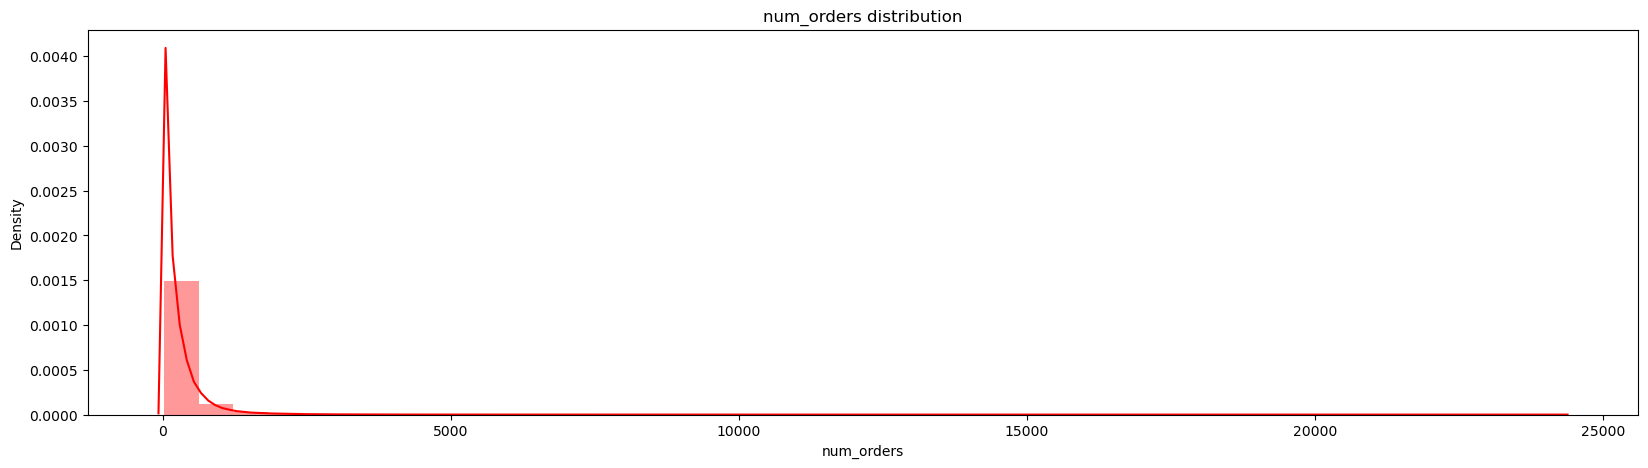

In [377]:
plt.figure(figsize=(20,5))
sns.distplot(train_df['num_orders'], bins=40, kde=True, color='red')
plt.title('num_orders distribution')
plt.show()

* ***num_orders distribution is very right skewed***

In [68]:
train_df.query("num_orders > 15000")

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
14050,1452474,5,43,2290,159.08,311.43,1,1,24299
19700,1300512,7,43,2290,159.08,311.43,1,1,15336


In [381]:
len(train_df.query("num_orders > 5000"))

263

In [389]:
len(train_df.query("num_orders > 3000"))

1133

In [391]:
len(train_df)

456548

In [399]:
print(f'Percentage of num_orders over 3000: {100 * len(train_df.query("num_orders > 3000"))/len(train_df):.2f}%') 

Percentage of num_orders over 3000: 0.25%


In [493]:
print(f'Percentage of num_orders over 2000: {100 * len(train_df.query("num_orders > 2000"))/len(train_df):.2f}%')

Percentage of num_orders over 2000: 0.74%


In [586]:
print(f'Percentage of num_orders over 1500: {100 * len(train_df.query("num_orders > 1500"))/len(train_df):.2f}%')

Percentage of num_orders over 1500: 1.54%


In [440]:
print(f'Percentage of num_orders over 1000: {100 * len(train_df.query("num_orders > 1000"))/len(train_df):.2f}%')

Percentage of num_orders over 1000: 3.77%


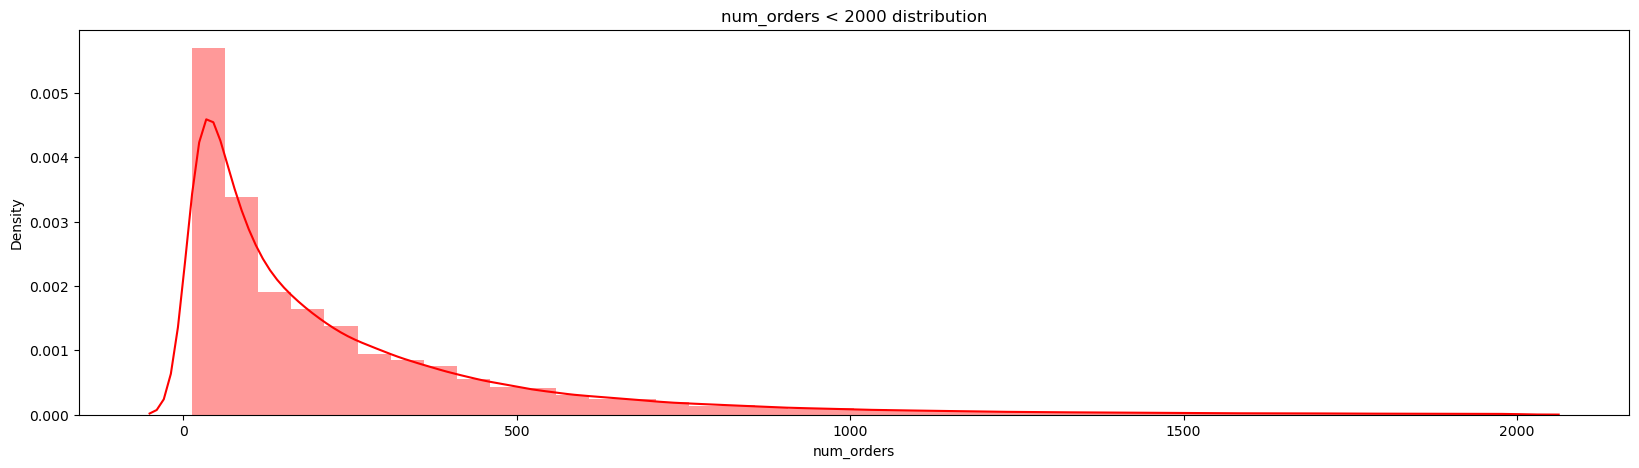

In [497]:
plt.figure(figsize=(20,5))
sns.distplot(train_df.query("num_orders < 2000")['num_orders'], bins=40, kde=True, color='red')
plt.title('num_orders < 2000 distribution')
plt.show()

#### Merge the reference data ####

In [444]:
df = pd.merge(train_df, center_info, on="center_id", how="left")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01,647,56,TYPE_C,2.0


In [446]:
df = pd.merge(df, meal_info, on="meal_id", how="left")
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,2020-01-01,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,2020-01-01,647,56,TYPE_C,2.0,Beverages,Indian


* *Note: Since all the features in meal_info will be tied to the meal_id, and all features in center_info will be related to center_id,*
    * Does it make sense that center_id and meail_id could technically represent the sum of their features for this particular use case??
    * *i.e., predictions are also by week per center and per meal*

#### EDA ####

1. Handle Missing values
2. Understand the features that need to be encoded
3. Correlation of features
4. Feature selection
5. Distribution of orders across centers
6. Distribution of orders by meal ids
7. Orders by center type, by other key center features
8. Orders by meal category and cuisine
9. Impact of email promo and featuring on homepage

*Note that most of these are not really necessary for the problem statement, since the goal is simply predicting the orders for next 10 weeks by center_id and meal_id*

#### Drop Columns
* Drop 'id' column as it is not needed for modeling

In [449]:
df.drop('id', axis=1, inplace=True)
df.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
1,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai


##### Features to be encoded #####
1. center_type - LabelEncoder
2. category - LabelEncoder
3. cuisine - LabelEncoder

In [451]:
label_encoded_cols = ['center_type', 'category', 'cuisine']

##### Distribution of orders by categorical columns #####

In [459]:
def catcol_info_dist(col, xticks=45):
    print(pd.DataFrame({col: df[col].value_counts(),
                        "Percentage": 100 * df[col].value_counts() / len(df)}))
    print("--------------------------------------------")
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=xticks)

              category  Percentage
category                          
Beverages       127890   28.012389
Rice Bowl        33408    7.317522
Sandwich         33291    7.291895
Pizza            33138    7.258382
Starters         29941    6.558128
Other Snacks     29379    6.435030
Desert           29294    6.416412
Salad            28559    6.255421
Pasta            27694    6.065956
Seafood          26916    5.895547
Biryani          20614    4.515188
Extras           13562    2.970553
Soup             12675    2.776269
Fish             10187    2.231310
--------------------------------------------


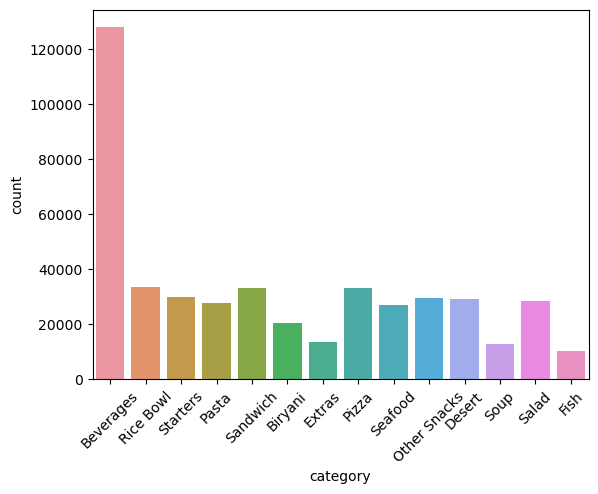

In [461]:
catcol_info_dist('category')

* ***Beverages seem to be the most ordered category by far***
* ***Rest of the categories seem relatively equally ordered except Fish, Soup and Extras which are about 50% of the rest of the categories***

             cuisine  Percentage
cuisine                         
Italian       122925   26.924880
Thai          118216   25.893444
Indian        112612   24.665972
Continental   102795   22.515705
--------------------------------------------


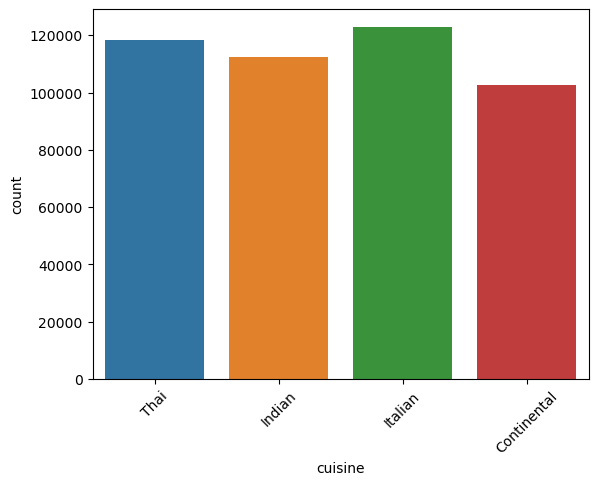

In [467]:
catcol_info_dist('cuisine')        

* ***Orders are fairly evenly distributed by cuisine***

             center_type  Percentage
center_type                         
TYPE_A            262881   57.580145
TYPE_C             99593   21.814355
TYPE_B             94074   20.605500
--------------------------------------------


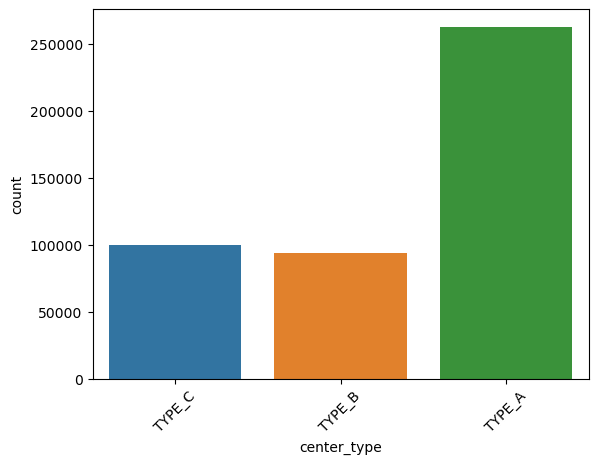

In [469]:
catcol_info_dist('center_type')

* ***TYPE_A centers seem to get the bulk of the orders - almost 2.5 times the other types***

                       emailer_for_promotion  Percentage
emailer_for_promotion                                   
0                                     419498   91.884753
1                                      37050    8.115247
--------------------------------------------


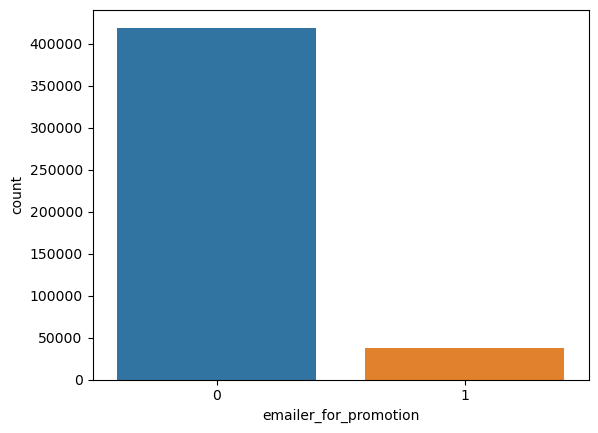

In [473]:
catcol_info_dist('emailer_for_promotion', 0)

                   homepage_featured  Percentage
homepage_featured                               
0                             406693   89.080009
1                              49855   10.919991
--------------------------------------------


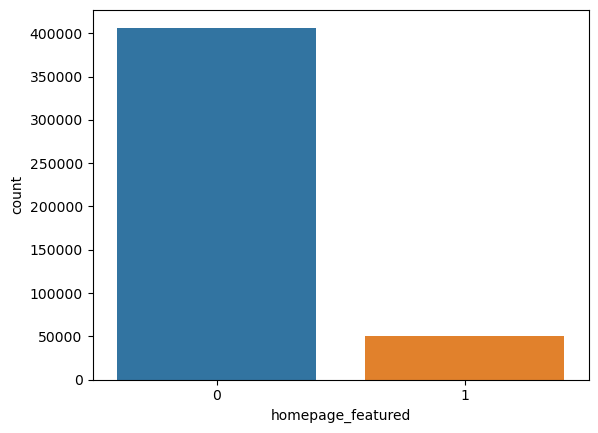

In [475]:
catcol_info_dist('homepage_featured', 0)

         op_area  Percentage
op_area                     
4.0        52548   11.509852
3.9        48533   10.630427
3.8        40080    8.778924
4.4        26060    5.708053
4.5        25688    5.626572
2.8        25503    5.586050
4.1        23346    5.113592
7.0        20686    4.530958
4.8        18648    4.084565
3.4        17258    3.780106
3.6        16821    3.684388
5.1        13366    2.927622
4.2        12608    2.761594
2.7        12430    2.722605
3.0        11184    2.449688
2.0         9512    2.083461
6.7         7046    1.543321
6.3         7015    1.536531
5.6         6993    1.531712
3.7         6801    1.489657
3.5         6666    1.460087
3.2         6333    1.387149
5.0         6164    1.350132
5.3         6053    1.325819
4.6         5983    1.310487
4.7         5975    1.308734
2.4         5021    1.099775
2.9         4712    1.032093
1.9         4083    0.894320
0.9         3432    0.751728
--------------------------------------------


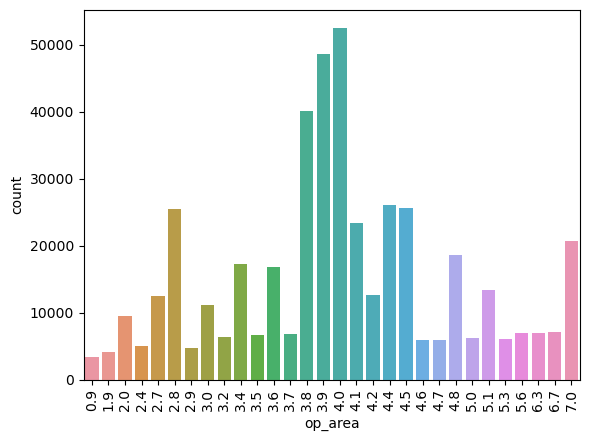

In [477]:
catcol_info_dist('op_area', 90)

In [588]:
corr = df.corr(numeric_only=True).round(3)
corr

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
week,1.000,-0.003,0.020,0.027,0.029,-0.001,-0.008,-0.017,0.000,0.005,0.002
center_id,-0.003,1.000,0.010,0.001,0.001,0.014,-0.005,-0.053,0.061,-0.003,-0.112
meal_id,0.020,0.010,1.000,0.011,0.003,0.013,0.016,0.011,-0.003,-0.002,-0.002
checkout_price,0.027,0.001,0.011,1.000,0.953,0.005,-0.057,-0.282,-0.005,-0.004,0.022
base_price,0.029,0.001,0.003,0.953,1.000,0.171,0.057,-0.222,-0.002,-0.002,0.018
emailer_for_promotion,-0.001,0.014,0.013,0.005,0.171,1.000,0.391,0.277,-0.005,-0.007,-0.019
homepage_featured,-0.008,-0.005,0.016,-0.057,0.057,0.391,1.000,0.294,0.009,0.004,0.041
num_orders,-0.017,-0.053,0.011,-0.282,-0.222,0.277,0.294,1.000,0.042,0.030,0.177
city_code,0.000,0.061,-0.003,-0.005,-0.002,-0.005,0.009,0.042,1.000,0.043,0.131
region_code,0.005,-0.003,-0.002,-0.004,-0.002,-0.007,0.004,0.030,0.043,1.000,0.023


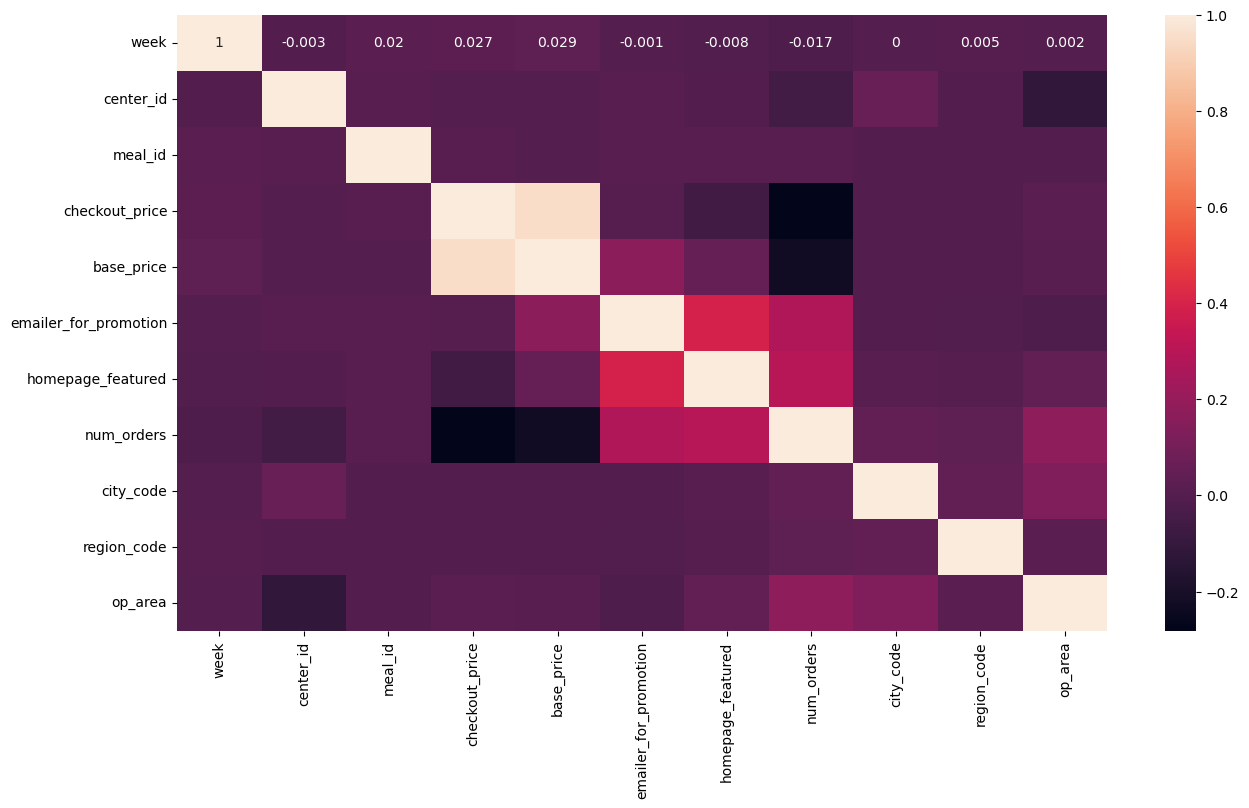

In [592]:
plt.figure(figsize= (15,8))
sns.heatmap(corr, annot= True);

In [590]:
corr[['num_orders']].sort_values('num_orders')

,num_orders
checkout_price,-0.282
base_price,-0.222
center_id,-0.053
week,-0.017
meal_id,0.011
region_code,0.030
city_code,0.042
op_area,0.177
emailer_for_promotion,0.277
homepage_featured,0.294


* ***Shows good positive correlation with `emailer_for_promotion, homepage_featured, op_area` - as expected***
* ***Shows negative correlation with `checkout_price, base_price`***

#### Let's try to quantify the correlation of orders to these values,
* `emailer_for_promotion, homepage_featured, op_area, checkout_price, base_price`

In [491]:
df.head(2)

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Date,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai
1,1,55,1993,136.83,135.83,0,0,270,2020-01-01,647,56,TYPE_C,2.0,Beverages,Thai


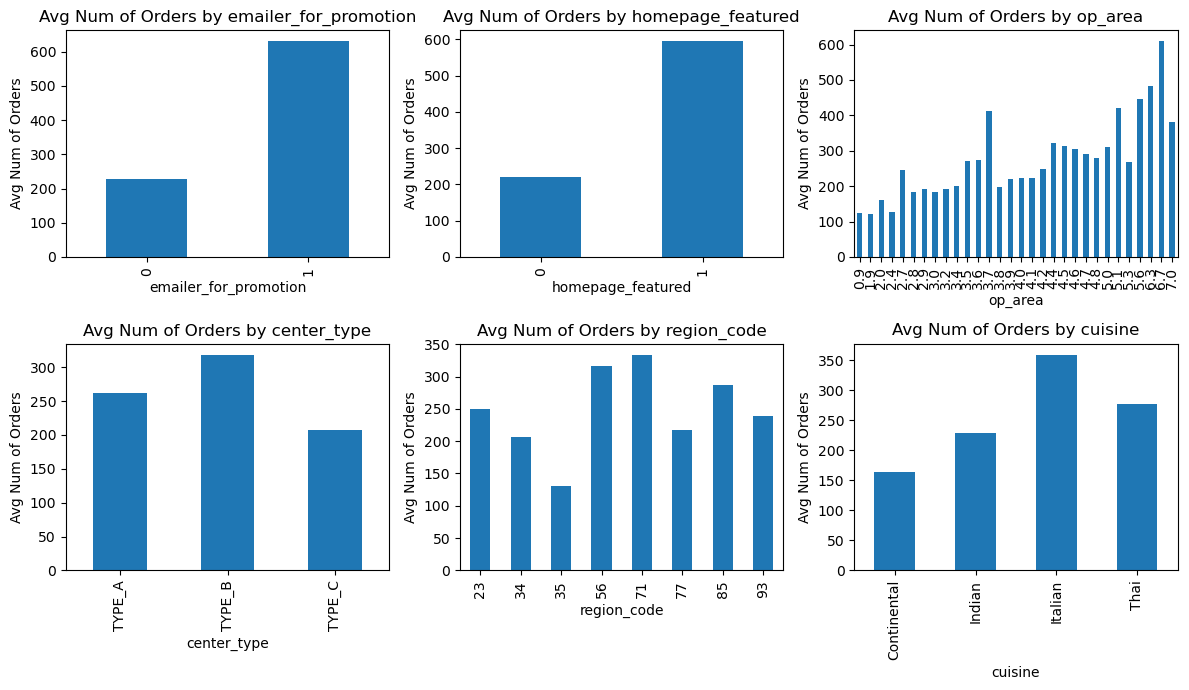

In [513]:
fig, axs = plt.subplots(2, 3, figsize=(12, 7))
cols = ['emailer_for_promotion', 'homepage_featured', 'op_area', 'center_type', 'region_code', 'cuisine']
axes = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

for col, ax_pos in zip(cols, axes):
    ax = axs[ax_pos]
    df.groupby(col)['num_orders'].mean().plot(kind='bar', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Avg Num of Orders')
    ax.set_title('Avg Num of Orders by ' + col)
plt.tight_layout()
plt.show()


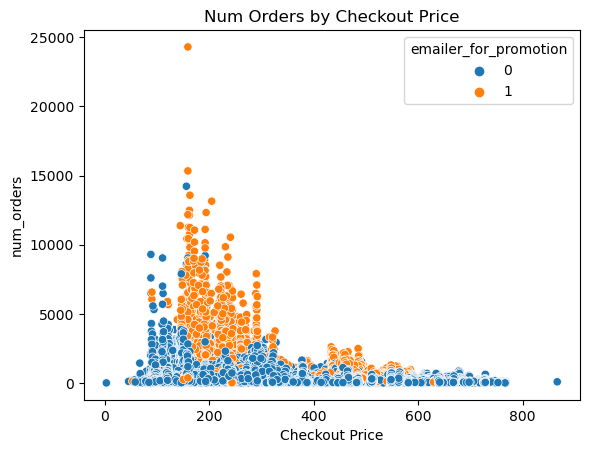

In [571]:
import seaborn as sns

# Create a scatter chart
sns.scatterplot(x='checkout_price', y='num_orders', data=df, hue='emailer_for_promotion')

# Add title and labels
plt.title('Num Orders by Checkout Price')
plt.xlabel('Checkout Price')
plt.ylabel('num_orders')

# Show the chart
plt.show()


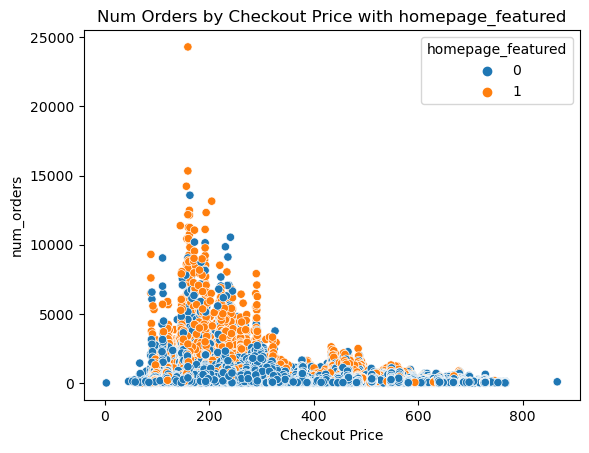

In [577]:
# Create a scatter chart - add hue of homepage_featured
sns.scatterplot(x='checkout_price', y='num_orders', data=df, hue='homepage_featured')

# Add title and labels
plt.title('Num Orders by Checkout Price with homepage_featured')
plt.xlabel('Checkout Price')
plt.ylabel('num_orders')

# Show the chart
plt.show()


* ***`Lower prices` clearly attract more orders***
* ***And `homepage_featured, emailer_for_promotion` also have a big impact in higher number of orders***

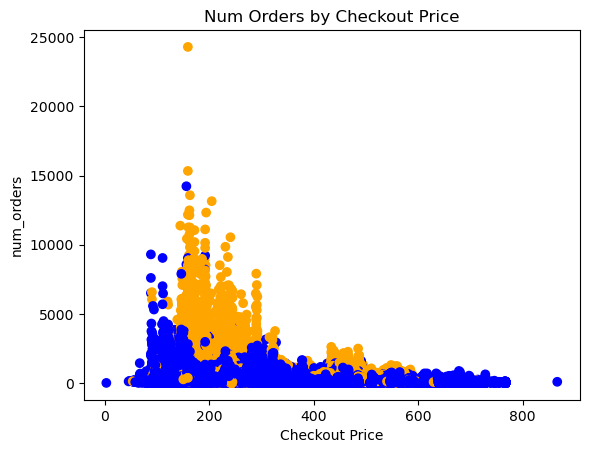

In [575]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['blue', 'orange'])
# Create a scatter chart
plt.scatter(x='checkout_price', y='num_orders', data=df, c=cmap(df['emailer_for_promotion']))

# Add title and labels
plt.title('Num Orders by Checkout Price')
plt.xlabel('Checkout Price')
plt.ylabel('num_orders')

# Show the chart
plt.show()

##### Decompose the Time Series

In [484]:
ts=df.groupby("Date")["num_orders"].sum()

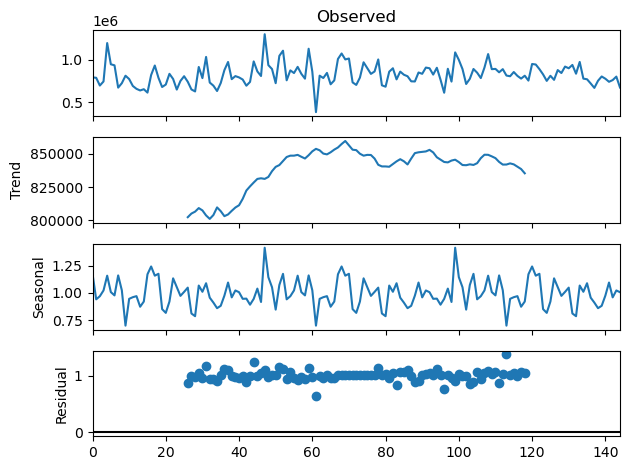

In [338]:
# Visualize Residuals, Seasonal, Trend, and level
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(ts.values, period=52, model="multiplicative")
res.plot()
plt.show()

* *We can see some repeating seasonal pattern*
* *And increasing trend during the 2nd quartile of the 145 week period, but then it plateaud and slightly declined*

#### Modeling

##### Train / Test Split

In [17]:
# train-test split function for Time Series dataset
def ts_train_test_split(X, y, test_size):
    index = int(test_size*len(X))+1
    
    X_train = X.iloc[:-index]
    y_train = y.iloc[:-index]
    X_test = X.iloc[-index:]
    y_test = y.iloc[-index:]
    
    return X_train, X_test, y_train, y_test

In [114]:
X = train_merged.drop(['num_orders'], axis = 1)
y = train_merged['num_orders']
X.shape, y.shape

((456548, 13), (456548,))

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((365238, 13), (91310, 13), (365238,), (91310,))

#### Linear Regression Model

In [118]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

rmsle_scorer = make_scorer(mean_squared_log_error, greater_is_better=False, squared=False)


In [120]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer

transformer = make_column_transformer((LabelEncoder(), label_encoded_cols))
preprocessor = ColumnTransformer(
    transformers=[
        ('label_encoder', LabelEncoder(), label_encoded_cols)
    ])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lr_pipe = Pipeline([('transform', preprocessor),
                    ('model', LinearRegression())])
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
rmsle = rmsle_scorer(y_test, y_pred)
print(f'RMSLE: {rmsle}')


### LSTM predictions

#### Encode categorical columns

In [137]:
train_merged[['center_type', 'category', 'cuisine']] = train_merged[['center_type', 'category', 'cuisine']].apply(LabelEncoder().fit_transform)
train_merged


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,136.83,152.29,0,0,177,647,56,2,2.0,0,3
1,1,55,1993,136.83,135.83,0,0,270,647,56,2,2.0,0,3
2,1,55,2539,134.86,135.86,0,0,189,647,56,2,2.0,0,3
3,1,55,2139,339.50,437.53,0,0,54,647,56,2,2.0,0,1
4,1,55,2631,243.50,242.50,0,0,40,647,56,2,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,473,77,0,4.5,2,1
456544,145,61,2304,482.09,482.09,0,0,42,473,77,0,4.5,2,1
456545,145,61,2664,237.68,321.07,0,0,501,473,77,0,4.5,9,2
456546,145,61,2569,243.50,313.34,0,0,729,473,77,0,4.5,9,2


#### Scale relevant numerical columns

In [141]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_merged[['checkout_price', 'base_price']] = scaler.fit_transform(train_merged[['checkout_price', 'base_price']])
train_merged

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,0.155056,0.119543,0,0,177,647,56,2,2.0,0,3
1,1,55,1993,0.155056,0.099245,0,0,270,647,56,2,2.0,0,3
2,1,55,2539,0.152774,0.099282,0,0,189,647,56,2,2.0,0,3
3,1,55,2139,0.389818,0.471292,0,0,54,647,56,2,2.0,0,1
4,1,55,2631,0.278617,0.230787,0,0,40,647,56,2,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,0.557303,0.528708,0,0,68,473,77,0,4.5,2,1
456544,145,61,2304,0.554987,0.526242,0,0,42,473,77,0,4.5,2,1
456545,145,61,2664,0.271875,0.327677,0,0,501,473,77,0,4.5,9,2
456546,145,61,2569,0.278617,0.318145,0,0,729,473,77,0,4.5,9,2


In [143]:
train_merged[['op_area']] = scaler.fit_transform(train_merged[['op_area']])
train_merged

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1,55,1885,0.155056,0.119543,0,0,177,647,56,2,0.180328,0,3
1,1,55,1993,0.155056,0.099245,0,0,270,647,56,2,0.180328,0,3
2,1,55,2539,0.152774,0.099282,0,0,189,647,56,2,0.180328,0,3
3,1,55,2139,0.389818,0.471292,0,0,54,647,56,2,0.180328,0,1
4,1,55,2631,0.278617,0.230787,0,0,40,647,56,2,0.180328,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,0.557303,0.528708,0,0,68,473,77,0,0.590164,2,1
456544,145,61,2304,0.554987,0.526242,0,0,42,473,77,0,0.590164,2,1
456545,145,61,2664,0.271875,0.327677,0,0,501,473,77,0,0.590164,9,2
456546,145,61,2569,0.278617,0.318145,0,0,729,473,77,0,0.590164,9,2


In [157]:
# Prepare data for LSTM
X_train = train_merged.drop(['num_orders'], axis=1)
y_train = train_merged['num_orders']
X_train.shape, y_train.shape

((456548, 13), (456548,))

In [159]:
# Reshape data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_train.shape, y_train.shape

((456548, 13, 1), (456548,))

In [167]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')

lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 13, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train model
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)
